In [1]:
import numpy as np
import pandas as pd
import Thermobar as pt
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import warnings as w
pd.options.display.max_columns = None

In [2]:
plt.style.use("seaborn-colorblind")
plt.rcParams["font.family"] = 'arial'
plt.rcParams["font.size"] =12
plt.rcParams["mathtext.default"] = "regular"
plt.rcParams["mathtext.fontset"] = "dejavusans"
plt.rcParams['patch.linewidth'] = 1
plt.rcParams['axes.linewidth'] = 1
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["xtick.major.size"] = 6 # Sets length of ticks
plt.rcParams["ytick.major.size"] = 4 # Sets length of ticks
plt.rcParams["ytick.labelsize"] = 12 # Sets size of numbers on tick marks
plt.rcParams["xtick.labelsize"] = 12 # Sets size of numbers on tick marks
plt.rcParams["axes.titlesize"] = 14 # Overall title
plt.rcParams["axes.labelsize"] = 14 # Axes labels

In [3]:
out=pt.import_excel(r'../LEPR_Wet_Stitched_Sept2022.xlsx', sheet_name='Plag-Liq')
myPlags1=out['Plags']
myLiquids1=out['Liqs']
Plag_Glass=out['my_input']
notinLEPR= Plag_Glass['Citation_x'].str.contains('notinLEPR')
notinKeith=(Plag_Glass['Citation_x'].str.contains('Mercer, C.N., and Johnston, A.D. (2008)'))|(Plag_Glass['Citation_x'].str.contains('Alonso-Perez, R., Müntener, O., and Ulmer, P. (2009)'))
newMask=notinLEPR|notinKeith
newMask=newMask.fillna(False)

mask_1GPa=Plag_Glass['P_kbar_x']<13
mask_1GPa=mask_1GPa.fillna(False)

Press_new=mask_1GPa&newMask
Press_new=Press_new.fillna(False)

Eq_tests=pt.calculate_plag_liq_eq_tests(liq_comps=myLiquids1, plag_comps=myPlags1, P=Plag_Glass['P_kbar_x'], T=Plag_Glass['T_K_x'])
# Keith suggests best equilibrium test is Observed Kd (Ab-An)
Eq_Mask=Plag_Glass['T_K_x']>0
xT=Plag_Glass['T_K_x'].loc[Press_new&Eq_Mask]
xH=Plag_Glass['H2O_Liq'].loc[Press_new&Eq_Mask]

x=Plag_Glass['P_kbar_x'].loc[Press_new&Eq_Mask]

#Filt=Press_new&Eq_Mask

C:\Users\penny\AppData\Local\Temp\ipykernel_11332\1392894821.py:6: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  notinKeith=(Plag_Glass['Citation_x'].str.contains('Mercer, C.N., and Johnston, A.D. (2008)'))|(Plag_Glass['Citation_x'].str.contains('Alonso-Perez, R., Müntener, O., and Ulmer, P. (2009)'))


In [4]:
P2005_eq24a=pt.calculate_fspar_liq_press_temp(liq_comps=myLiquids1, 
        plag_comps=myPlags1, 
        equationT="T_Put2008_eq24a", equationP="P_Put2008_eq25", eq_tests=True)

P2005_eq23=pt.calculate_fspar_liq_press_temp(liq_comps=myLiquids1, 
        plag_comps=myPlags1, 
        equationT="T_Put2008_eq23", equationP="P_Put2008_eq25", eq_tests=True)

In [5]:
InEq=P2005_eq24a['Pass An-Ab Eq Test Put2008?'].str.contains('Yes')

## Assesing sensitivity to H2O content and other variables

In [6]:
#Filt=[596, 624, 700, 415, 354, 309, 525, 618, 513, 478, 631, 291, 290,
       # 541, 430, 675, 505, 318, 359, 378, 522, 358, 562, 564, 651, 514,
       # 637, 384, 498, 372, 344, 456, 315, 573, 282, 662, 338]

In [7]:
rand_choice=Plag_Glass.loc[Plag_Glass['H2O_Liq']>0].index.values
choose=np.random.choice(rand_choice, 40)
Filt=[616, 647,  13,  34,  76, 505, 262, 240, 437, 551, 474, 291, 337,
        92, 705, 242, 628, 464, 353, 370, 392, 256, 218, 642, 262, 546,
       568, 485, 277, 373, 384,  30, 446, 299, 470, 590, 217, 331, 252,
       283]

In [8]:
delta_H_lin=np.linspace(-3, 3, 100)
PH_Pet_T25=np.empty([len(delta_H_lin), len(Plag_Glass.loc[Filt])], dtype=float)

for i in range(0, len(delta_H_lin)):
    import warnings as w
    with w.catch_warnings():
        w.simplefilter('ignore')
        
    
    PH_Pet_T25[i]=pt.calculate_fspar_liq_press_temp(liq_comps=myLiquids1.loc[Filt], 
        plag_comps=myPlags1.loc[Filt], equationP="P_Put2008_eq25",
                equationT="T_Put2008_eq24a",
        H2O_Liq=Plag_Glass['H2O_Liq'].loc[Filt]+delta_H_lin[i]).P_kbar_calc
       
Exp_Pet_Iter_T25=pt.calculate_fspar_liq_press_temp(liq_comps=myLiquids1.loc[Filt], 
        plag_comps=myPlags1.loc[Filt], equationP="P_Put2008_eq25",
                equationT="T_Put2008_eq24a",
        H2O_Liq=Plag_Glass['H2O_Liq'].loc[Filt]).P_kbar_calc

In [9]:
delta_T_lin=np.linspace(-100, 100, 100)
PT_Pet_T25=np.empty([len(delta_T_lin), len(Plag_Glass.loc[Filt])], dtype=float)

for i in range(0, len(delta_T_lin)):
    import warnings as w
    with w.catch_warnings():
        w.simplefilter('ignore')
        
    PT_Pet_T25[i]=pt.calculate_fspar_liq_press(liq_comps=myLiquids1.loc[Filt], 
        plag_comps=myPlags1.loc[Filt], equationP="P_Put2008_eq25",
        H2O_Liq=Plag_Glass['H2O_Liq'],
        T=Plag_Glass['T_K_x'].loc[Filt]+delta_T_lin[i])
    
Exp_Pet_T25=pt.calculate_fspar_liq_press(liq_comps=myLiquids1.loc[Filt], 
        plag_comps=myPlags1.loc[Filt], equationP="P_Put2008_eq25",
                T=Plag_Glass['T_K_x'].loc[Filt],
        H2O_Liq=Plag_Glass['H2O_Liq'].loc[Filt])

In [10]:
print(np.average(PT_Pet_T25[0, :]-PT_Pet_T25[-1, :])/20)
print(np.average(PH_Pet_T25[0, :]-PH_Pet_T25[-1, :])/6)

-0.25644837885193006
0.9924433541899065


In [11]:
Filt2=[5]
pt.calculate_fspar_liq_press(liq_comps=myLiquids1.loc[Filt2], 
        plag_comps=myPlags1.loc[Filt2], equationP="P_Put2008_eq25",
        H2O_Liq=Plag_Glass['H2O_Liq'].loc[Filt2],
        T=1400)

5    7.487928
dtype: float64

In [12]:
pt.calculate_fspar_liq_press(liq_comps=myLiquids1.loc[Filt2], 
        plag_comps=myPlags1.loc[Filt2], equationP="P_Put2008_eq25",
        H2O_Liq=5,
        T=1400)

5    7.487928
dtype: float64

## X-y plots with equilibrium filters

In [14]:
P2005_eq24a_knownT=pt.calculate_fspar_liq_press(liq_comps=myLiquids1, 
        plag_comps=myPlags1, T=Plag_Glass['T_K_x'],
        equationP="P_Put2008_eq25", eq_tests=True)

In [15]:
P2005_eq24a=pt.calculate_fspar_liq_press_temp(liq_comps=myLiquids1, 
        plag_comps=myPlags1, 
        equationT="T_Put2008_eq24a", equationP="P_Put2008_eq25", eq_tests=True)

P2005_eq23=pt.calculate_fspar_liq_press_temp(liq_comps=myLiquids1, 
        plag_comps=myPlags1, 
        equationT="T_Put2008_eq23", equationP="P_Put2008_eq25", eq_tests=True)

In [16]:
P2005_eq24a.head()

,Pass An-Ab Eq Test Put2008?,P_kbar_calc,T_K_calc,Delta_P_kbar_Iter,Delta_T_K_Iter,Delta_An,Delta_Ab,Delta_Or,Pred_An_EqE,Pred_Ab_EqF,Pred_Or_EqG,Obs_Kd_Ab_An,SiO2_Plag,TiO2_Plag,Al2O3_Plag,FeOt_Plag,MnO_Plag,MgO_Plag,CaO_Plag,Na2O_Plag,K2O_Plag,Cr2O3_Plag,Sample_ID_Plag,Si_Plag_cat_prop,Mg_Plag_cat_prop,Fet_Plag_cat_prop,Ca_Plag_cat_prop,Al_Plag_cat_prop,Na_Plag_cat_prop,K_Plag_cat_prop,Mn_Plag_cat_prop,Ti_Plag_cat_prop,Cr_Plag_cat_prop,sum,Si_Plag_cat_frac,Mg_Plag_cat_frac,Fet_Plag_cat_frac,Ca_Plag_cat_frac,Al_Plag_cat_frac,Na_Plag_cat_frac,K_Plag_cat_frac,Mn_Plag_cat_frac,Ti_Plag_cat_frac,Cr_Plag_cat_frac,An_Plag,Ab_Plag,Or_Plag,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,Cr2O3_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,NiO_Liq,CoO_Liq,CO2_Liq,Sample_ID_Liq,SiO2_Liq_mol_frac,MgO_Liq_mol_frac,MnO_Liq_mol_frac,FeOt_Liq_mol_frac,CaO_Liq_mol_frac,Al2O3_Liq_mol_frac,Na2O_Liq_mol_frac,K2O_Liq_mol_frac,TiO2_Liq_mol_frac,P2O5_Liq_mol_frac,Cr2O3_Liq_mol_frac,Si_Liq_cat_frac,Mg_Liq_cat_frac,Mn_Liq_cat_frac,Fet_Liq_cat_frac,Ca_Liq_cat_frac,Al_Liq_cat_frac,Na_Liq_cat_frac,K_Liq_cat_frac,Ti_Liq_cat_frac,P_Liq_cat_frac,Cr_Liq_cat_frac,Mg_Number_Liq_NoFe3,Mg_Number_Liq_Fe3,P,T
0,Low T: Yes,17.217945,1205.962439,0.0,0.0,0.381316,0.129557,0.018966,0.877797,0.354991,0.000005,0.432419,55.599998,0.03,26.400000,0.39,0.02,0.03,9.660000,5.21,0.31,0.0,0,0.925367,0.000744,0.005428,0.172262,0.517845,0.168122,0.006582,0.000282,0.000376,0.0,1.797007,0.514949,0.000414,0.003021,0.095860,0.288171,0.093557,0.003663,0.000157,0.000209,0.0,0.496481,0.484549,0.018970,65.800003,0.23,13.700000,1.94,0.09,0.26,3.30,1.01,1.98,0.0,0.0,6.5,0.0,0.0,0.0,0.0,0,0.803317,0.004732,0.000931,0.019807,0.043167,0.098562,0.011954,0.015419,0.002112,0.0,0.0,0.713467,0.004203,0.000827,0.017592,0.038339,0.175076,0.021233,0.027389,0.001876,0.0,0.0,0.192830,0.192830,17.217945,1205.962439
1,Low T: Yes,-2.015297,1081.668568,0.0,0.0,0.509260,0.249470,0.014089,1.136105,0.109581,0.000016,0.157044,52.299999,0.08,29.400000,0.35,0.01,0.07,12.700000,4.02,0.24,0.0,1,0.870444,0.001737,0.004872,0.226473,0.576691,0.129722,0.005096,0.000141,0.001002,0.0,1.816176,0.479273,0.000956,0.002682,0.124698,0.317530,0.071426,0.002806,0.000078,0.000551,0.0,0.626845,0.359051,0.014104,61.599998,0.50,16.400000,3.26,0.06,0.82,4.87,3.08,1.90,0.0,0.0,11.0,0.0,0.0,0.0,0.0,1,0.724231,0.014372,0.000597,0.032053,0.061348,0.113623,0.035105,0.014249,0.004422,0.0,0.0,0.622739,0.012358,0.000514,0.027561,0.052751,0.195401,0.060370,0.024504,0.003802,0.0,0.0,0.309568,0.309568,-2.015297,1081.668568
2,Low T: Yes,2.195818,1192.346117,0.0,0.0,0.224875,0.074548,0.011542,0.997549,0.141201,0.000034,0.086739,49.400002,0.06,31.799999,0.74,0.02,0.08,15.100000,2.33,0.19,0.0,2,0.822178,0.001985,0.010300,0.269271,0.623768,0.075187,0.004034,0.000282,0.000751,0.0,1.807756,0.454806,0.001098,0.005698,0.148953,0.345051,0.041591,0.002232,0.000156,0.000416,0.0,0.772675,0.215749,0.011576,60.299999,0.30,16.500000,2.31,0.06,0.54,5.02,2.88,1.67,0.0,0.0,7.6,0.0,0.0,0.0,0.0,2,0.732931,0.009785,0.000618,0.023481,0.065377,0.118183,0.033936,0.012948,0.002743,0.0,0.0,0.629089,0.008398,0.000530,0.020154,0.056114,0.202878,0.058255,0.022226,0.002354,0.0,0.0,0.294133,0.294133,2.195818,1192.346117
3,Low T: Yes,0.705652,1082.145614,0.0,0.0,0.389456,0.034117,0.007150,1.256269,0.091911,0.000009,0.060670,47.400002,0.05,33.900002,0.40,0.03,0.09,17.299999,1.39,0.12,0.0,3,0.788892,0.002233,0.005567,0.308502,0.664960,0.044854,0.002548,0.000423,0.000626,0.0,1.818605,0.433789,0.001228,0.003061,0.169637,0.365643,0.024664,0.001401,0.000233,0.000344,0.0,0.866813,0.126028,0.007159,59.400002,0.46,16.299999,3.62,0.16,1.00,5.37,2.30,1.62,0.0,0.0,12.3,0.0,0.0,0.0,0.0,3,0.715475,0.017956,0.001632,0.036465,0.069304,0.115697,0.026857,0.012447,0.004168,0.0,0.0,0.619459,0.015547,0.001413,0.031571,0.060003,0.200341,0.046505,0.021553,0.003608,0.0,0.0,0.329944,0.329944,0.705652,1082.145614
4,Low T: Yes,-2.186202,1007.972283,0.0,0.0,0.650152,0.109266,0.007567,1.

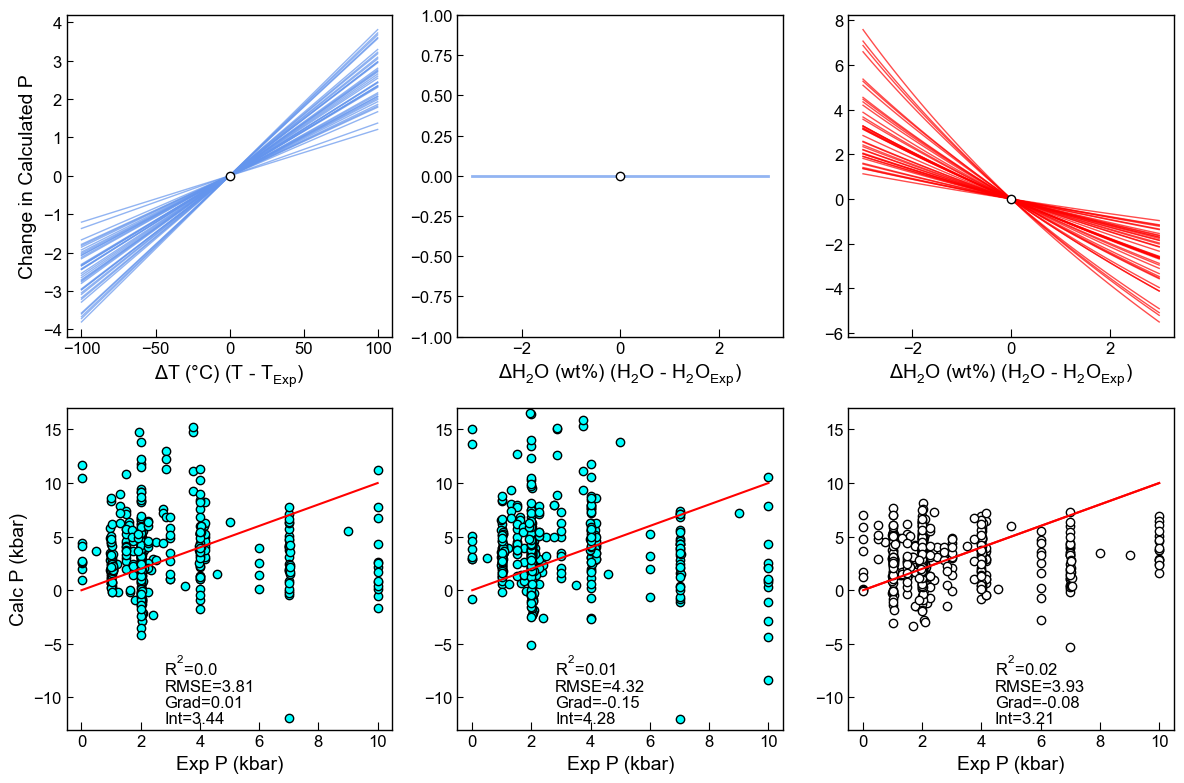

In [18]:
## Combined plot


fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(12,8))

################### Sensitivity#########################################3

for i in range(0, np.shape(PT_Pet_T25)[1]):
        #plt.plot(H_lin, H_31[:, i]-H_31[0, i], '.k', label="Iterating P and T", alpha=0.3)
    b=1
    ax3.plot(delta_H_lin, -(Exp_Pet_Iter_T25.iloc[i]-PH_Pet_T25[:, i]),
             '-', color='red', alpha=0.7, lw=1)

    ax1.plot(delta_T_lin, -(Exp_Pet_T25.iloc[i]- PT_Pet_T25[:, i]), 
                '-', color='cornflowerblue', alpha=0.7, lw=1)
    
ax2.plot([-3, 3], [0, 0], '-', color='cornflowerblue', alpha=0.7, lw=2)
    
ax1.set_xlabel('ΔT (°C) (T - T$_{Exp}$)')
ax1.set_ylabel('Change in Calculated P') # \n (Calc P $_{T}$ - Calc P$_{T_{Exp} }$)
ax2.set_xlabel('ΔH$_2$O (wt%) (H$_2$O - H$_2$O$_{Exp}$)')
ax3.set_xlabel('ΔH$_2$O (wt%) (H$_2$O - H$_2$O$_{Exp}$)')
#ax3.set_ylabel('Change in Calculated P \n (Calc P $_{H{_2}O}$ - Calc P$_{H{_2}O_{Exp} }$)')


ax1.plot(0, 0, 'ok', mfc='white')
ax2.plot(0, 0, 'ok', mfc='white')
ax3.plot(0, 0, 'ok', mfc='white')

ax2.set_ylim([-1, 1])
fig.tight_layout()


##################### Actual Experiments #########################################3
ax4.plot(x.loc[InEq], P2005_eq24a_knownT['P_kbar_calc'].loc[Press_new&Eq_Mask&InEq], 'ok', mfc='cyan')
ax5.plot(x.loc[InEq], P2005_eq24a['P_kbar_calc'].loc[Press_new&Eq_Mask&InEq], 'ok', mfc='cyan')

ax4.plot([0, 10], [0, 10], '-r')

Stats_KnownH1=pt.calculate_R2(x.loc[InEq], P2005_eq24a_knownT['P_kbar_calc'].loc[Press_new&Eq_Mask&InEq],
                             xy=False, df=True)

ax4.annotate("R$^{2}$="+str(Stats_KnownH1['R2'].iloc[0]), xy=(0.3, 0.17),
xycoords="axes fraction", fontsize=12)
ax4.annotate("RMSE="+str(Stats_KnownH1['RMSE'].iloc[0]), xy=(0.3, 0.12),
xycoords="axes fraction", fontsize=12)
ax4.annotate("Grad="+str(Stats_KnownH1['Grad'].iloc[0]), xy=(0.3, 0.07),
xycoords="axes fraction", fontsize=12)
ax4.annotate("Int="+str(Stats_KnownH1['Int'].iloc[0]), xy=(0.3, 0.02),
xycoords="axes fraction", fontsize=12)


Stats_KnownH2=pt.calculate_R2(x.loc[InEq], P2005_eq24a['P_kbar_calc'].loc[Press_new&Eq_Mask&InEq],
                              xy=False, df=True)

ax5.annotate("R$^{2}$="+str(Stats_KnownH2['R2'].iloc[0]), xy=(0.3, 0.17),
xycoords="axes fraction", fontsize=12)
ax5.annotate("RMSE="+str(Stats_KnownH2['RMSE'].iloc[0]), xy=(0.3, 0.12),
xycoords="axes fraction", fontsize=12)
ax5.annotate("Grad="+str(Stats_KnownH2['Grad'].iloc[0]), xy=(0.3, 0.07),
xycoords="axes fraction", fontsize=12)
ax5.annotate("Int="+str(Stats_KnownH2['Int'].iloc[0]), xy=(0.3, 0.02),
xycoords="axes fraction", fontsize=12)
ax5.plot([0, 10], [0, 10], '-r')

ax5.yaxis.set_tick_params(which='both', labelbottom=True)
ax6.yaxis.set_tick_params(which='both', labelbottom=True)

ax4.set_xlabel('Exp P (kbar)')
ax4.set_ylabel('Calc P (kbar)')
ax5.set_xlabel('Exp P (kbar)')
#ax5.set_ylabel('Calc P (kbar)')
ax6.set_xlabel('Exp P (kbar)')
#ax6.set_ylabel('Calc P (kbar)')
## Random number generator
P_rand=np.random.normal(np.mean(x), np.std(x),  len(x))
#np.random.rand(len(x))*10
#P_rand=np.random.normal(len(x))*10
s=pd.Series(P_rand)

Stats_KnownH3=pt.calculate_R2(x.loc[InEq], s.loc[InEq], xy=False, df=True)

ax6.annotate("R$^{2}$="+str(Stats_KnownH3['R2'].iloc[0]), xy=(0.45, 0.17),
xycoords="axes fraction", fontsize=12)
ax6.annotate("RMSE="+str(Stats_KnownH3['RMSE'].iloc[0]), xy=(0.45, 0.12),
xycoords="axes fraction", fontsize=12)
ax6.annotate("Grad="+str(Stats_KnownH3['Grad'].iloc[0]), xy=(0.45, 0.07),
xycoords="axes fraction", fontsize=12)
ax6.annotate("Int="+str(Stats_KnownH3['Int'].iloc[0]), xy=(0.45, 0.02),
xycoords="axes fraction", fontsize=12)
ax6.plot([0, 10], [0, 10], '-r')

# ax4.aset_title('Iteration: Eq 25 (P) & Eq 24a (T)')
# ax5.set_title('Iteration: Eq 25 (P) & Eq 23 (T)')
# ax6.set_title('Random Number Generator')

ax6.plot(x, P_rand, 'ok', mfc='white')
ax6.plot([0, 10], [0, 10], '-r')

ax4.set_ylim([-13, 17])
ax5.set_ylim([-13, 17])
ax6.set_ylim([-13, 17])
plt.tight_layout()
fig.savefig('All_PlagBarometry.png', dpi=200)